# Financial Theory in Python

El objetivo de este documento es compartir conceptos básicos financieros y algunas maneras de implementarlos en Python.

### Flujo de Efectivo

Al combinar tiempo y dinero obtenemos la noción de Flujo de Efectivo. 

### Ejemplo
Consideremos una inversión en algún proyecto que cueste 9.5 en la moneda que gustes el día de hoy y que te pagará 11.75 unidades después de un año. La inversión se llama *Salida* y el pago *Entrada*.

Para indicar los momentos en los que suceden las acciones suele anotarse con un subindice. $C_0 = -9.5$ y $C_1 = 11.75$. 

In [1]:
c0 = -9.5
c1 = 11.75
c = [c0,c1]
c

[-9.5, 11.75]

### Retorno 

Considera un proyecto de inversión en el que tienes el siguiente flujo de efectivo. $c = (c_0,c_1) = (-10,12)$. El **Retorno** de este proyecto es la suma de sus flujos $ R = c_0 + c_1 = -10 + 12 = 2$. La **Tasa de Retorno** es el el retorno dividido por el valor absoluto de $C_0$.

$$ r = \frac{R}{\mid C_0\mid} = \frac{-10 + 12}{10} = \frac{2}{10} = 0.2$$

In [2]:
c = [-10,12]
R = sum(c)
r = R / abs(c[0])

print("El retorno de este ejemplo es de {} y la tasa de retorno de {}".format(R, r))

El retorno de este ejemplo es de 2 y la tasa de retorno de 0.2


### Interés

Existe una diferencia entre tener un flujo de efectivo hoy y tenerlo dentro de un año. La diferencia consta del interés que es ganado o pagado por unidad de moneda. En este contexto el interes es el *precio* que se paga a quien tiene control o a quien le pertenece el dinero.

Suponga que un agente (nombre que puede recibir una persona, empresa, institución, gobierno, etc) deposita $C_0 = -10$ el día de hoy en el banco. Y de acuerdo al contrato que tienen con el banco recibiran $C_1 = 11$ dentro de un año. El interés que se está pagando sobre este depósito es de $ I = C_0 + C_1 = -10 + 11 = 1$. La *Tasa de Interés* es de $ i = \frac{I}{\mid C_0 \mid} = 0.1$.

En este ejemplo se asume que la tasa de interés de depósitos y préstamos es la misma y es fija para toda la economía.

### Valor Presente

El tener la opcíon de prestar o depositar dinero lleva a lo que se conoce como *Costo de Oportunidad* al invertir en un proyecto. En un flujo de efectivo, digamos, $C_1 = 12.1$ en un año, no se puede comparar de forma directa con un flujo de efectivo de $C_0 = 12.1$ hoy, dado que se puede ganar interés en las unidades adquiridas el día de hoy.

Para comparlo de manera adecuada se traen los flujos futuros al día de hoy, se calcula su *valor presente*. Esto se realiza mediante un descuento, utilizando el interés de la economía, conocida usualmente como la tasa libre de riesgo.

$$ c_0 = D(c_1) = \frac{c_1}{1+i} = \frac{12.1}{1+0.1} = 11$$

dada una tasa de interés de $i = 0.1$. Esta relación resulta de la alternativa de depósitos en un banco.

$$ c_1 = (1+i) \cdot c_0 ⟺ c_0 = \frac{c_1}{1+i}$$

In [3]:
i = 0.1 

def D(c1):
    return c1 / (1+i)

print(D(12.1))
print(D(11))

10.999999999999998
10.0


### Valor Presente Neto (NPV Siglas en inglés)

¿Cómo decide un agente si realizar un proyecto de inversión? Uno de los criterios más comunes es el *Valor Presente Neto*, esta es la suma de la salida del flujo de efectivo el día de hoy y el valor presente de la entrada del flujo de efectivo en un año.

$$ NPV(c) = c_0 + D(c_1)   $$

El valor presente neto viene de una función $NPV:\mathbb{R}^2 → \mathbb{R} $ que convierte un flujo de efectivo a número real. Si el valor presente neto es positivo, se debería de realizar el proyecto, de lo contrario, no se realiza, dado que es más atractivo depositar el dinero en un banco.

Consideremos el siguiente ejemplo con un flujo de efectivo $c = (-10.5, 12.1)$. Entonces el valor presente neto es $ NPV(c) = -10.5 + D(12.1) = -10.5 + 11 = 0.5 $ Por lo que sí se debe realizar el proyecto. 

In [4]:
def NPV(c):
    return c[0] + D(c[1])

cA = (-10.5, 12.1)
cB = (-10.5, 11)

print("Se debe realizar el proyecto A con NPV: {} y no el proyecto B con NPV: {}".format(NPV(cA), NPV(cB)))

Se debe realizar el proyecto A con NPV: 0.4999999999999982 y no el proyecto B con NPV: -0.5


### Flujos de caja

El flujos de caja analiza el dinero recibido o pagado de cantidades desiguales o iguales (no agrupadas) que ocurren en intervalos regulares. Estaremos combinando algunos de los temas mencionados hasta el momento.

#### Ejemplo

Decide si se debería de realizar el siguiente proyecto y los cálculos que hemos revisado hasta el momento del siguiente proyecto; el cual tiene una inversión inicial de 80,000 con una tasa de descuento es de 10.5% (Tasa libre de riesgo, costo del interés) y genera los siguientes flujos: 5,000, 4,500, 5,500, 4,000, 115,000. 

In [5]:
c0 = -80000
i = .105

c1 = 5000
c2 = 4500
c3 = 5500
c4 = 4000
c5 = 115000

c = [c0, c1, c2, c3, c4, c5]

def flujo_de_caja(flujo: list, i: float):
    R = sum(flujo)
    r = R / abs(flujo[0])
    n = 1
    pagos_presente = [flujo[0]]
    for pago in flujo[1:]:
        pagos_presente.append(pago / (1+i)**n)
        n += 1
    vpn = sum(pagos_presente)
    return [R, r, vpn]

ans = flujo_de_caja(c,i)

print("El Retorno es R = {}. La tasa de retorno es r = {}. Y su NPV = {}.".format(ans[0], ans[1], ans[2]))

El Retorno es R = 54000. La tasa de retorno es r = 0.675. Y su NPV = 4774.632754754821.


## Valor de Dinero en el Tiempo

La frase valor del dinero en función del tiempo describe los cálculos basados en
la capacidad del dinero de devengar intereses durante un período determinado
de tiempo. En otras palabras, el valor que tiene el dinero en diferentes momentos. 

La fórmula más general del valor del dinero en el tiempo es:

$$ F = P ⋅ (1 + \frac{i}{n} )^{(n⋅t)}$$

donde:

- F es el valor futuro del dinero
- P es el valor actual del dinero
- i es la tasa de interés
- t es número de años
- n es el número de periodos por año

#### Ejemplos
1. Encuentra el valor futuro de 7,800 después de que se invirtió por 4 años con un interés de 5% anual.



In [6]:
# 1
c0 = -7800 #Valor actual
i = .05
n = 1
t = 4

def fv(pv, i, n, t):
    '''
    pv: Valor Presente (negativo si es inversion)
    i: interes
    n: numero de periodos anuales
    t: numero de anos
    '''
    return -pv*(1+(i/n))**(n*t)

c1 = fv(c0, i, n, t)
c = [c0,c1]
print(c[1])  #ans 1

9480.948750000001


### TIR

La tasa interna de retorno (TIR) es la rentabilidad que ofrece una inversión. Es decir, es el porcentaje de beneficio o pérdida que tendrá una inversión para las cantidades que no se han retirado del proyecto.

Está muy relacionada con el valor presente neto (NPV). De hecho, la TIR también se define como el valor de la tasa de descuento que hace que el NPV sea igual a cero, para un proyecto de inversión dado.

La tasa interna de retorno (TIR) nos da una medida relativa de la rentabilidad, es decir, va a venir expresada en tanto por ciento. El principal problema radica en su cálculo, ya que el número de periodos dará el orden de la ecuación a resolver. Para resolver este problema se puede acudir a diversas aproximaciones, utilizar una calculadora financiera o un programa informático.

$$ NPV = -C_0 + \sum_{n=1}^{N} \frac{Cn}{(1+r)^n} = 0 $$

Pero al ya entender el proceso de flujos de cajas, podemos utilizar algunas funciones que ya vienen integradas en `numpy-financial` para no tener que programar esta función. A partir de este punto nos estaremos apoyando con más herramientas financieras que tiene esta librería.

Veamos cuál sería la TIR para nuestro ejercicio anterior y si se cumple lo que se plantea.



In [7]:
pip install numpy_financial


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.3 MB 1.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy_financial as npf

In [9]:
c0 = -80000
i = .105

c1 = 5000
c2 = 4500
c3 = 5500
c4 = 4000
c5 = 115000

c = [c0, c1, c2, c3, c4, c5]

print(npf.irr(c))

0.11926249876987316


In [10]:
# Aplicación en un ejemplo anterior
# 1. Encuentra el valor futuro de 7,800 después de que se invirtió por 4 años con un interés de 5% anual.

c0 = -7800 #Valor actual
i = .05
n = 1
t = 4

def fv(pv, i, n, t):
    '''
    pv: Valor Presente (negativo si es inversion)
    i: interes
    n: numero de periodos anuales
    t: numero de anos
    '''
    return -pv*(1+(i/n))**(n*t)

c1 = fv(c0, i, n, t)
c = [c0,c1]
print(c[1])  #ans 1
print(npf.fv(pv=c0, rate=i/n, nper=n*t, pmt=0)) #pmt es para cuando se están realizando aportaciones en cada periodo

9480.948750000001
9480.948750000001


## Numpy-Financial

https://numpy.org/numpy-financial/latest/#

# Tipos de Intereses (Simple, Compuesto y Continuo)

Entender estos conceptos nos ayudará a entender las finanzas, especialmente las relacionadas a créditos. 

## Interés Simple 

Empecemos en el primer nivel: El interés simple paga un monto fijo a lo largo del tiempo. Este tipo de interés general el tipo de retorno más básico. Imaginemos depositar 100 en una cuenta con un interés simple de 50% anual. A lo largo de los años se vería así.

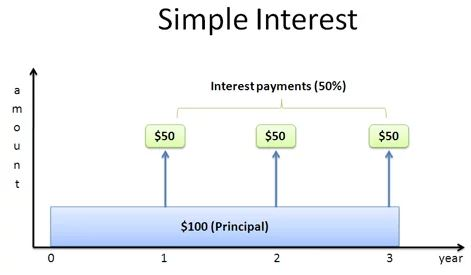

Se inicia con una inversión de 100 y se tiene una ganancia de 50 cada año. Se puede ver en azul el monto con el cual se realiza el cálculo y en verde el retorno generado, pero este es estático, no crece. Con interés simple los 50 sólo se quedan ahí parados, sólo los 100 originales están "trabajando" en generar dinero.

El Interés Simple tiene una fórmula muy sencilla:

$$ balance = C⋅r⋅n $$

- C: Capital Invertido, Inversión
- r: Tasa de interés
- n: Número de periodos de tiempo

Este interés funciona cuando tus ganancias son creadas por algo que no puede crecer más, como sería la gansa de los huevos de oro, no puedo ponerle más huevos para que crezca más la gansa, o como bonos de gobierno o bonos corporativos. No profundizaremos, porque no es un producto que estaremos manejando.

### Entendiendo el Crecimiento

Una analogía con la que podemos comparar la tasa de interés es la velocidad. Así como ir a 50 km/h significa que avanzaré 50 km en una hora, la tasa de interés $r=50%$ anual, significa que estaré ganando 50% del capital que haya invertido en un año ("La velocidad de crecimiento del dinero"). Entendiendo esto, podemos entender que no tenemos que esperar todo el periodo para avanzar algo e.g. manejando a 50 km/h, no significa que tengas que manejar una hora, podemos manejar únicamente 30 minutos y avanzar 25 km o 15 minutos y avanzar 12.5 km.

De manera similar, la tasa de interés te da la trayectoria o el ritmo que seguirá. Si tienes 100 invertidos a una tasa simple de 50% anual, estarás generando 50/anuales. Pero no tienes que estar todo el año, si lo invirtieras por 6 meses, obtendrías 25 y así sucesivamente. Esto lo podemos ejemplificar con el siguiente gráfico.

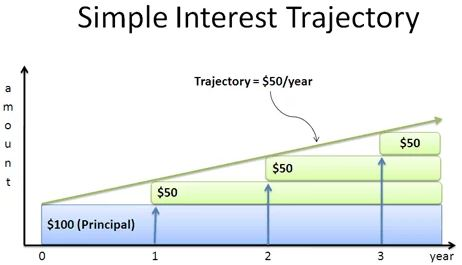

El interés simple siempre mantiene la misma trayectoria, la línea recta predice perfectamente dónde estaremos. Esto es simple, pero ayudará para comprender los siguientes modelos de interés. 


In [11]:
# Interés simple

c = 100 #Inversion realizada
r = 0.5 #tasa en periodo de repago, e.g. 50% anual o 25% en caso de que fuera semestral, seria equivalente
n = 3 #Periodos pagados, e.g. 3 anos

def simple_interest(c,r,n):
    return c*r*n

simple_interest(c,r,n)

150.0

## Interés Compuesto Simple

El interés simple debería hacernos cuestionarnos: **¿Por qué no genero interés con mis ganancias?** Deberíamos estar reinvirtiendo los 50 o invirtiendo los huevos de oro para poder clonar gansas doradas.

El interés Compuesto significa que tu interés gana interés. Einstein lo llamó *una de las fuerzas más poderosas de la naturaleza* y es verdad. Cuando tienes algo creciendo y esta crea más cosas crecientes entonces tu retorno crece rápidamente.

El tipo más básico de interés compuesto suele ser anual, veamos el siguiente ejemplo.

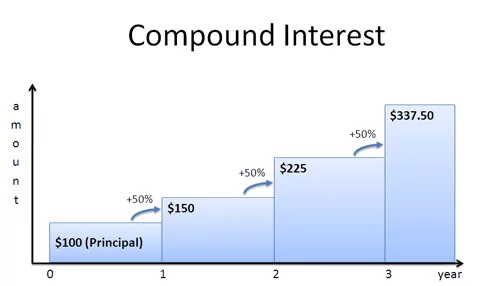

Se tiene una ganancia de 50 del año 0 - 1, tal como con el interés simple. Pero en el año 1 - 2, ahora se tiene un total de 150, por lo que se tiene una ganancia de 75 (50% * 150) dandonos 225 y así sucesivamente.

En general, tenemos (1 + r) veces más cosas cada año. Entonces con $n$ años, esto se convierte en:

$$ balance = P⋅(1+r)^n $$




### Interés como una fábrica

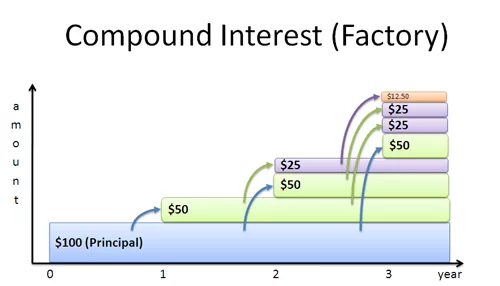

Lo que está sucediendo acá en cada año es:
0. Empezamos con 100
1. Nuestros 100 generan 50.
2. Nuestros 100 generan otros 50. Los 50 generan 25, lo que dan el total de 75.
3. Se empieza a poner un poco más cahótico. Los 100 generan un tercer monto de 50. Los dos montos de 50 existentes generan un monto de 25 cada uno. El de 25 genera uno de 12.50.
4. Este ejercicio queda al lector.



### Entendiendo la trayectoria

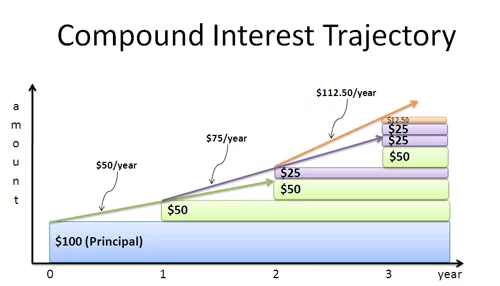

Con interés simple, manteníamos la misma trayectoria (50/año). Con interés compuesto, tenemos una trayectoria nueva cada año. Tecnicamente podemos imaginar que estamos solicitando al banquero que me pague más cada año, dado que tengo más dinero cada año.

- Año 1: Ahora tengo 150, debería estar ganando 75/año, no 50! Y el banquero lo sube a 75/año.
- Año 2: Ahora tengo 225, debería estar ganando 112.5/año, no 75! Y el banquero vuelve a ajustar.

Y así sucesivamente por siempre.




### Interés compuesto visto con Lupa

Esperar un periodo para ajustar el ingreso que se está generando es mejor que esperar una "eternidad" (como sucedía con el interés simple). Pero podemos hacer esto mejor y es solucionando lo que se llama la brecha de interés (Interest Gap). Haciendo zoom a lo que sucede en un año.

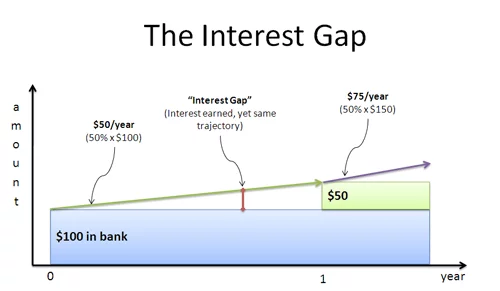

La línea verde representa el ritmo inicial (50/año), y el bloque sólido el dinero en nuestra cuenta. Después de 6 meses, hemos ganado 25, pero no vemos ni un centavo. Más importante que eso, mantenemos el mismo ritmo que el que tuvimos en un inicio. La **brecha de interés** muestra donde hemos generado interés, pero nos quedamos en nuestra trayectoria original. 

Los pagos periodicos se inventaron para mantener las cosas simples. Pero en realidad, se debería estar ganando dinero todo el tiempo. Podríamos pagar interes después de 6 meses para reducir la brecha.

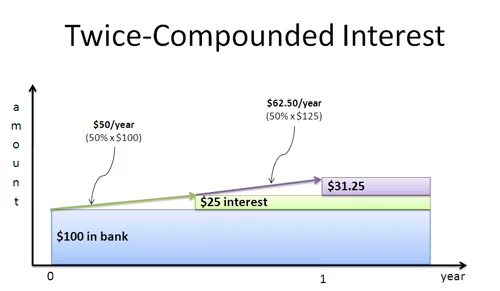

Lo que sucede en esta imagen es:

- Empezamos con 100 y una trayectoria de 50/año, normal
- Después de 6 meses nos dan 25, generando 125
- Continuamos usando la nueva trayectoria: 50% * 125 = 62.5/año
- Después de 6 meses recolectamos los 62.5/año por 1/2 año = 31.25. Ahora tenemos 125 + 31.25 = 156.25.

Lo importante aquí, es que nuestra trayectoria mejoró a la mitad del camino, por lo que adquirimos un extra de 6.25; lo que sería igual a 25 * 50% * 1/2 año.

Para el año 1, il impacto de la tasa r compuesta n veces es:

$$ (1 + \frac{r}{n})^n $$

En este caso, tuvimos (1 + 50%/2)^2. Repitiendo este proceos por t años tenemos:

$$ balance = P⋅(1+\frac{r}{n})^{nt}$$

El interés compuesto reduce el "espacio muerto" donde nuestro interés no está generando interés. Entre más pequeña la brecha más rápido actualizamos la trayectoria.

## Crecimiento Continuo

Crecimiento continuo sería tener interés compuesto en esteroides. Dividiendo infinitamente el gap, hasta haciendolo desaparecer, podemos agradecer a Euler.

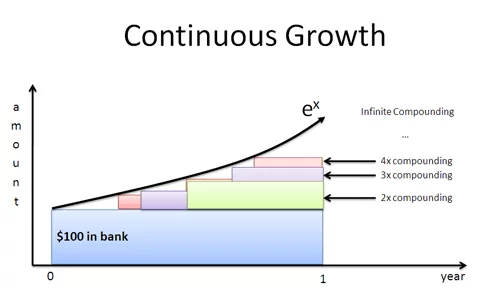

El efecto es hacer uso del interés en cuanto este es creado. Crecimiento continuo matiene la trayectoria en perfecta sincronización con tu monto actual. Si tenemos una tasa r y un tiempo t (en años), el resultado es:

$$ balance = P⋅e^{rt}$$

Lo más interesante es que para esta discusión podemos dejar a $e$ fuera de esto, ya que interés continuo no es utilizado usualmente en cálculos financieros. Sino que se usa el interés compuesto diario, $(1+\frac{r}{365})^{365}$, es una aproximación sufiecientemente buena a la continua.

Un principio general y tip para el lector: Cuando estés realizando una inversión, que te paguen el interés temprano para que puedas reinvertirlo. Cuando estés pidiendo un préstamo, pagala temprano y lo más seguido que puedas para evitar que se capitalice el interés.

In [12]:
## Formulas de intereses
import numpy as np


### FALTA DOCUMENTACION EN LAS FUNCIONES

# Function for calculating simple interest
def simple_interest(p, r, t):
    return p * (1 + (r * t)) - p

# Function for calculating simple compound interest
def simple_compound_interest(p, r, t, n):
    return p * ((1 + (r / n)) ** (n * t)) - p

# Function for calculating daily compound interest
def daily_compound_interest(p, r, t):
    return p * (1 + (r / 360)) ** (360 * t) - p

# Function for calculating continous interest
def continous_interest(p, r, t):
    return p * np.exp(r*t) - p


p = 1000000   # Monto
r = .0118/30  # Tasa diaria
r2 = .0118    # Tasa Mensual
t = 90        # Dias
t2 = 78/30    # dias base mensual
n = 30        # Periodicidad


print(simple_interest(p, r, t))
#print(simple_compound_interest(p, r2, t2, n))
print(simple_compound_interest(p, r, t, n))
print(daily_compound_interest(p, r, t))
print(continous_interest(p, r, t))

35400.00000000012
36033.79911667411
36034.01950902073
36034.03954376746
